Business Case: Currently, Aerofit offers multiple fitness products but lacks clarity on which customer segments are driving sales and which ones are underperforming. There is a need to identify:

1. Key demographic and behavioral factors that influence product selection and
usage.

2. High-value customer segments based on income, usage, and fitness.

3. Targeted marketing opportunities for different customer profiles.

This Document is prepared by Rohitabja Gupta


UNDERSTANDING THE DATA

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/aerofit_treadmill.csv')

In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
df.shape

(180, 9)

In [6]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Checking for duplicates and null values

In [8]:
df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [9]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
175,False
176,False
177,False
178,False


In [10]:
int(df.duplicated().sum())

0

OBSERVATIONS:

Clearly there is no null or duplicate values.


NON GRAPHICAL ANALYSIS

In [11]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [12]:
df['Product'].nunique()

3

In [13]:
df['Product'].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


In [14]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
df['Gender'].nunique()

2

In [16]:
df['Gender'].value_counts()

,count
Gender,
Male,104
Female,76


In [17]:
df['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

In [18]:
df['MaritalStatus'].nunique()

2

In [19]:
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


In [20]:
columns = ['Gender', 'MaritalStatus', 'Product']

for col in columns:
    df[col] = df[col].astype('category')


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [22]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**VISUAL ANALYSIS**

UNIVARIATE ANALYSIS

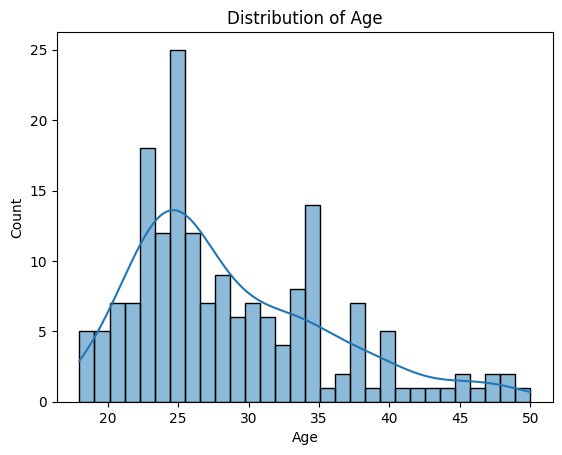

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Distribution of Age")
plt.show()

In [24]:
df['Education'].nunique()

8

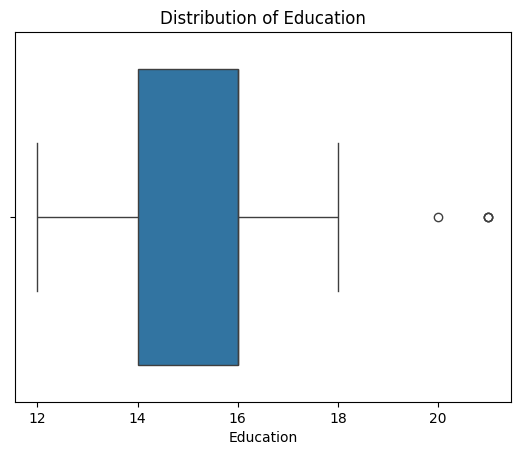

In [25]:
sns.boxplot(x=df['Education'])
plt.title("Distribution of Education")
plt.show()

In [26]:
df['Usage'].unique()

array([3, 2, 4, 5, 6, 7])

In [27]:
df['Usage'].nunique()

6

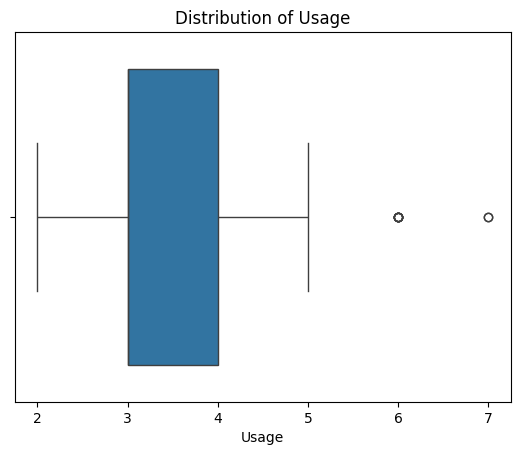

In [28]:
sns.boxplot(x=df['Usage'])
plt.title("Distribution of Usage")
plt.show()

In [29]:
df['Fitness'].unique()

array([4, 3, 2, 1, 5])

In [30]:
df['Fitness'].nunique()

5

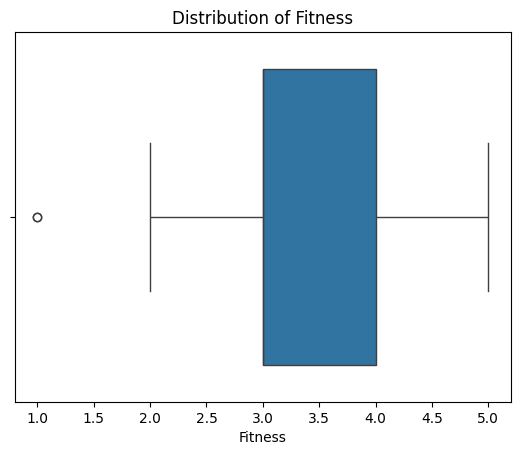

In [31]:
sns.boxplot(x=df['Fitness'])
plt.title("Distribution of Fitness")
plt.show()

In [32]:
df['Income'].nunique()

62

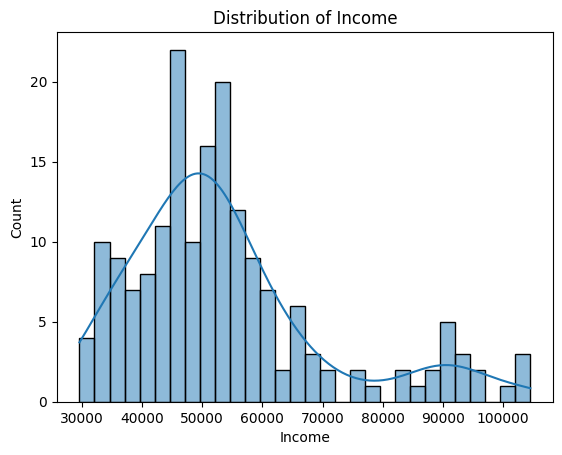

In [33]:
sns.histplot(df['Income'], bins=30, kde=True)
plt.title("Distribution of Income")
plt.show()

In [34]:
df['Miles'].nunique()

37

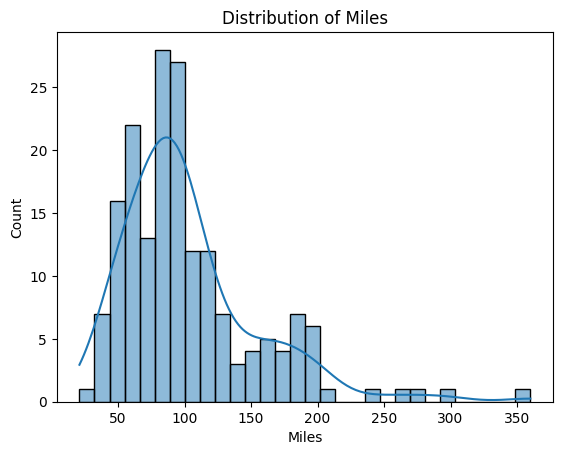

In [35]:
sns.histplot(df['Miles'], bins=30, kde=True)
plt.title("Distribution of Miles")
plt.show()

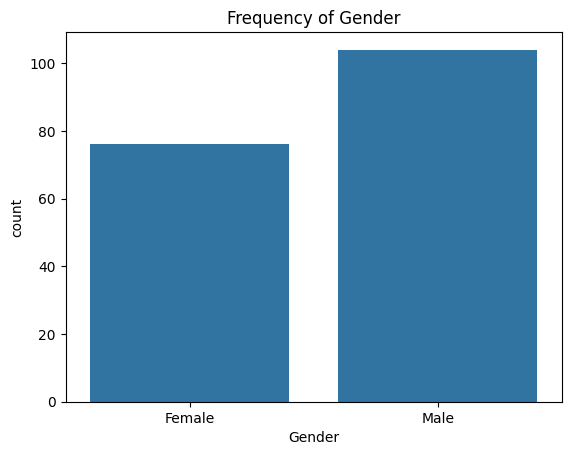

In [36]:
sns.countplot(x='Gender', data=df)
plt.title('Frequency of Gender')
plt.show()

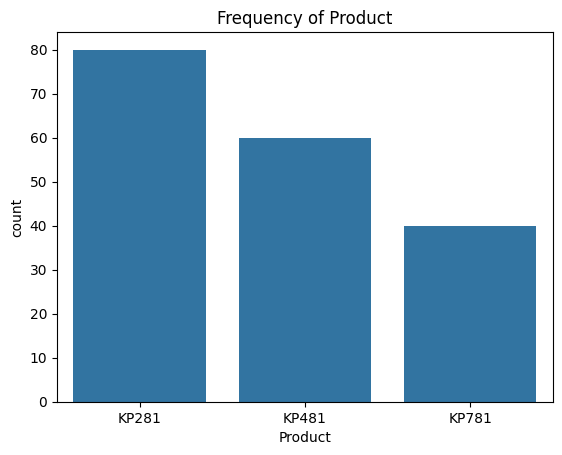

In [37]:
sns.countplot(x='Product', data=df)
plt.title('Frequency of Product')
plt.show()

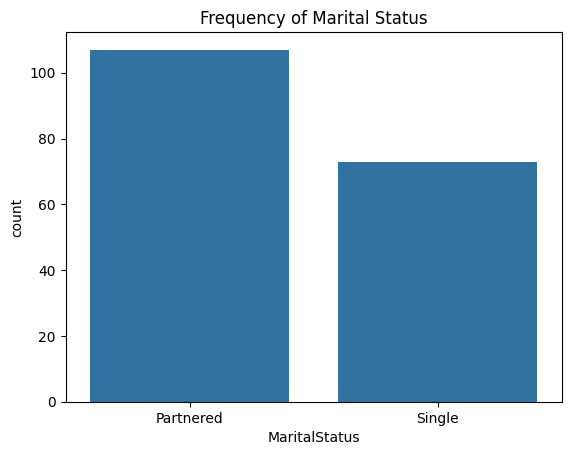

In [38]:
sns.countplot(x='MaritalStatus', data=df)
plt.title('Frequency of Marital Status')
plt.show()

BIVARIATE ANALYSIS

In [39]:
df.groupby('Product')['Income'].mean()

<ipython-input-39-e38419249e44>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Product')['Income'].mean()


,Income
Product,
KP281,46418.025
KP481,48973.650
KP781,75441.575


OBSERVATIONS:

Avearge salary of people who bought KP781 is $75441 which is significantly higher compared to people who bought KP481 AND KP281

In [40]:
df.groupby('Product')['Fitness'].mean()

<ipython-input-40-5c66d5ef5c9b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Product')['Fitness'].mean()


,Fitness
Product,
KP281,2.9625
KP481,2.9000
KP781,4.6250


OBSERVATIONS:

People who have fitness rating of 4 or above bought more KP781 , whereas people who have fitness rating below 3 bought more KP281 AND KP481

In [41]:
df.groupby('Product')['Miles'].mean()

<ipython-input-41-da10e1029ee5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Product')['Miles'].mean()


,Miles
Product,
KP281,82.787500
KP481,87.933333
KP781,166.900000


OBSERVATIONS:

People who walk aroud 160 plus miles , tend to buy KP781 else who walk/run less than 90 miles tend to buy KP281 and KP481 more.

In [42]:
df.groupby('Product')['Usage'].mean()

<ipython-input-42-4a489a5d6c55>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Product')['Usage'].mean()


,Usage
Product,
KP281,3.087500
KP481,3.066667
KP781,4.775000


OBSERVATIONS:

People who use more than 4 times a week tend to buy KP781 , whereas people who walk/run less tend to buy KP281 AND KP481

In [43]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

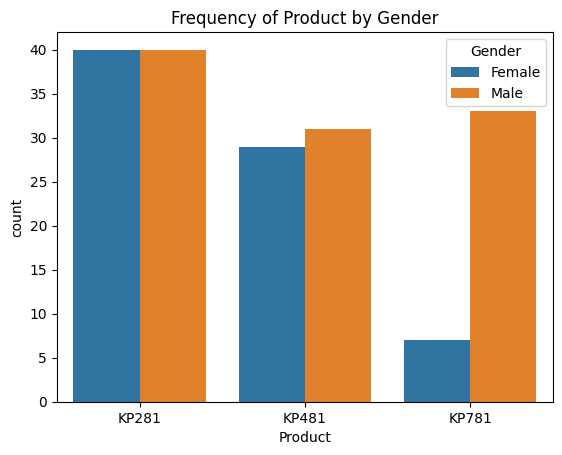

In [44]:
sns.countplot(x='Product', hue='Gender', data=df)
plt.title('Frequency of Product by Gender')
plt.show()

OBSERVATIONS:
Males tend to buy KP781 significantly more than females .

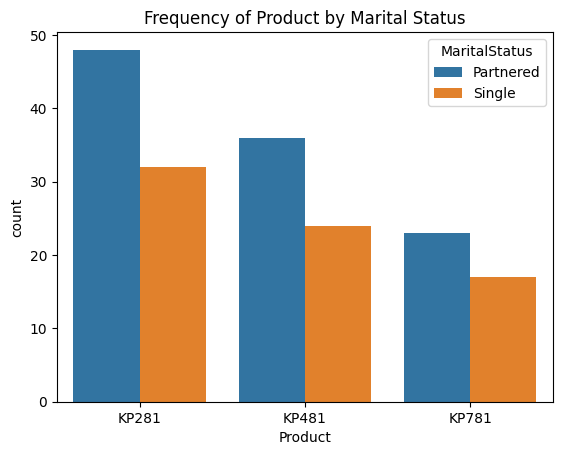

In [45]:
sns.countplot(x='Product', hue='MaritalStatus', data=df)
plt.title('Frequency of Product by Marital Status')
plt.show()

OBSERVATIONS:

Partnered individuals bought more products compared to single individuals.

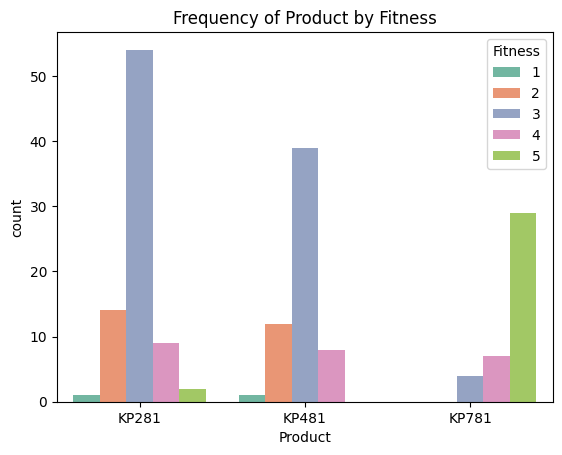

In [46]:
sns.countplot(x='Product', hue='Fitness', data=df ,palette='Set2')
plt.title('Frequency of Product by Fitness')
plt.show()

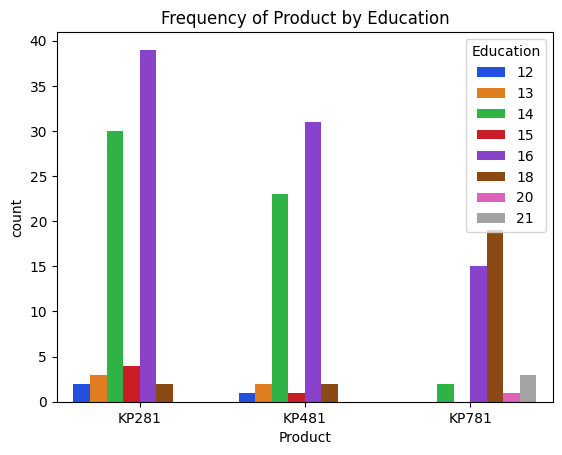

In [47]:
sns.countplot(x='Product', hue='Education', data=df,palette='bright')
plt.title('Frequency of Product by Education')
plt.show()

OBSERVATIONS:

People with more thanor equal to  18years in education buy KP781 whereas people with 16 years or less education tend to buy more KP481 and KP281.

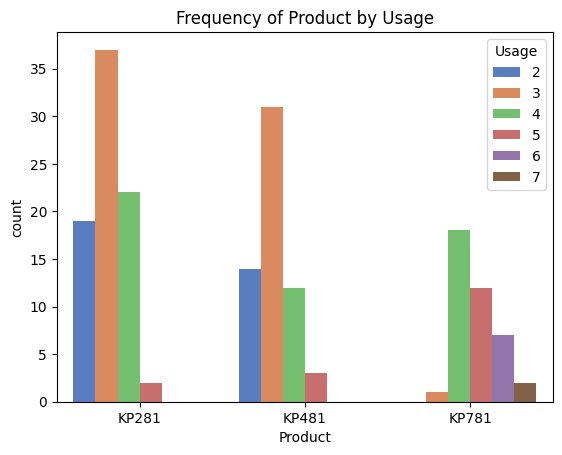

In [48]:
sns.countplot(x='Product', hue='Usage', data=df,palette='muted')
plt.title('Frequency of Product by Usage')
plt.show()

<ipython-input-49-a5a83b765df3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product', y='Age', data=df,palette='pastel')


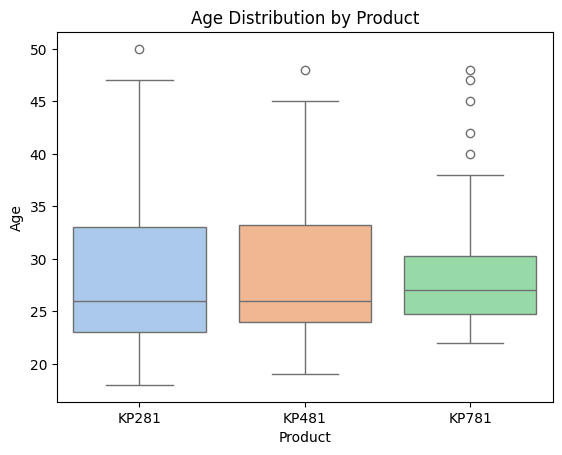

In [49]:
sns.boxplot(x='Product', y='Age', data=df,palette='pastel')
plt.title('Age Distribution by Product')
plt.show()

<ipython-input-50-efe47bd7f858>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product', y='Income', data=df,palette='Set2')


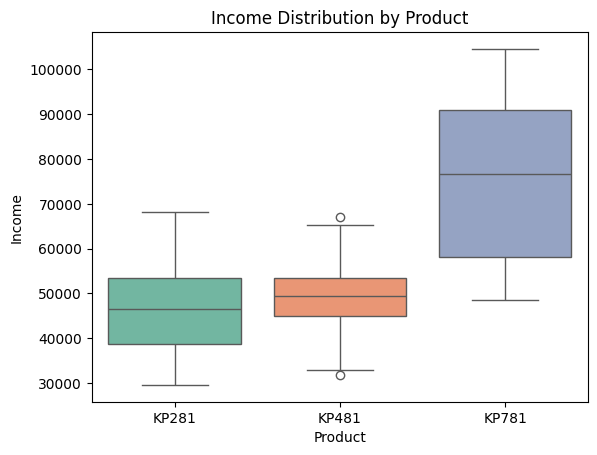

In [50]:
sns.boxplot(x='Product', y='Income', data=df,palette='Set2')
plt.title('Income Distribution by Product')
plt.show()

CORREALTION

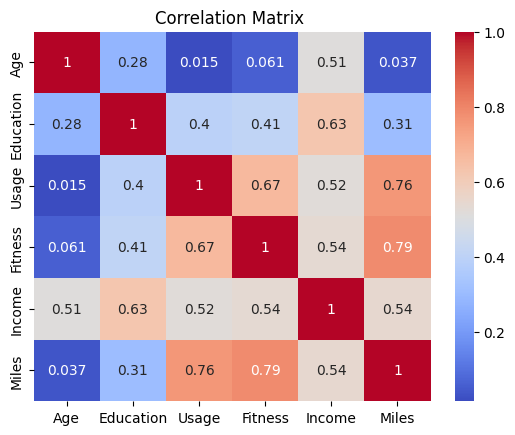

In [51]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix ')
plt.show()

OBSERVATIONS:

Here we will only be considering the correlations that are greater than 0.5

1. Usage and miles have a correaltion of 0.76
2. Fitness and miles have a  correlation of 0.79
3. education and income have a  correlation of 0.63
4. Age and income have a correlation of 0.51
5. Usage and fitness have a correlation of 0.67
6. Income and miles have a correlation of 0.54
7. Fitness and income have a correlation of 0.54
8. Usage and income have a correlation of 0.52

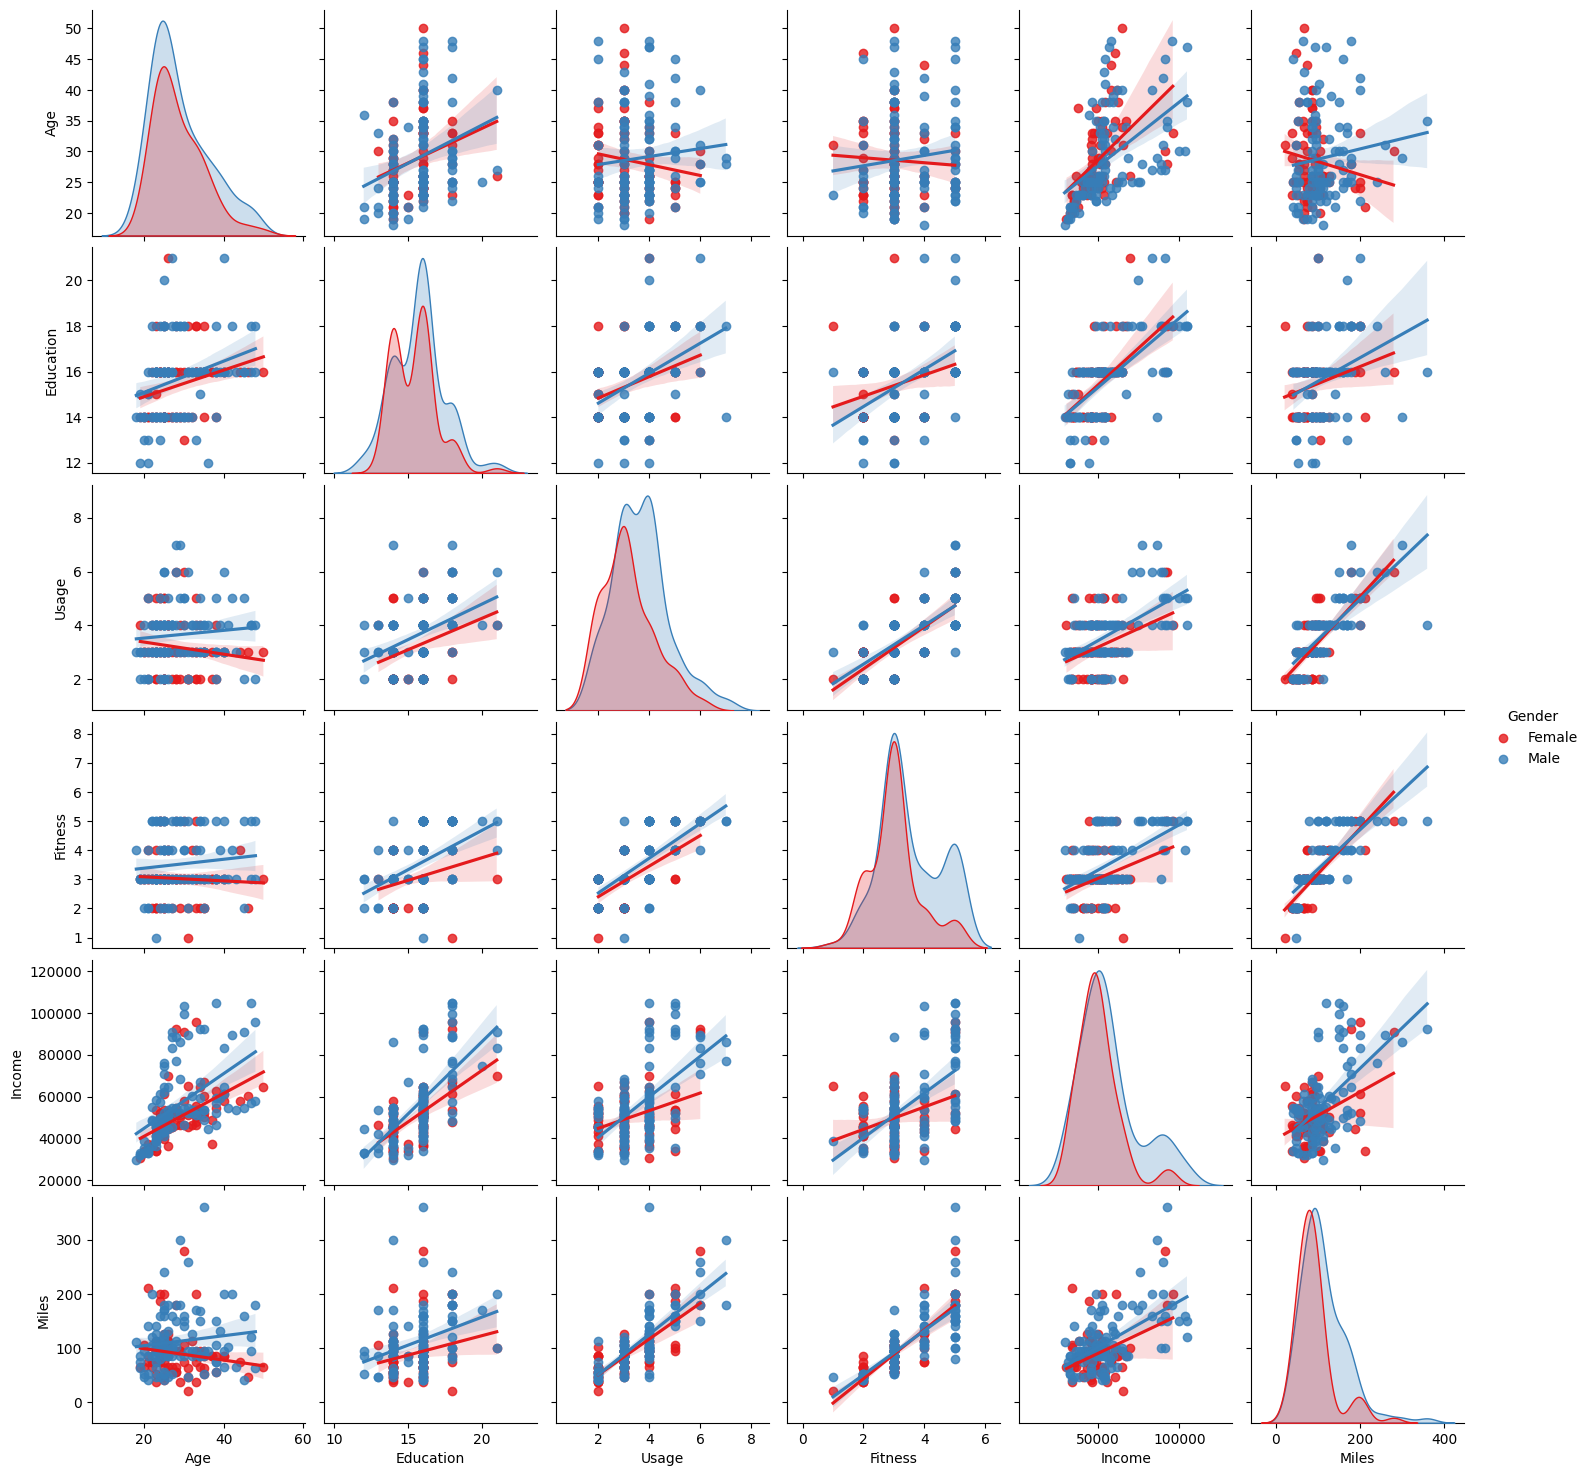

In [52]:
sns.pairplot(df, hue='Gender',kind='reg',palette='Set1')
plt.show()

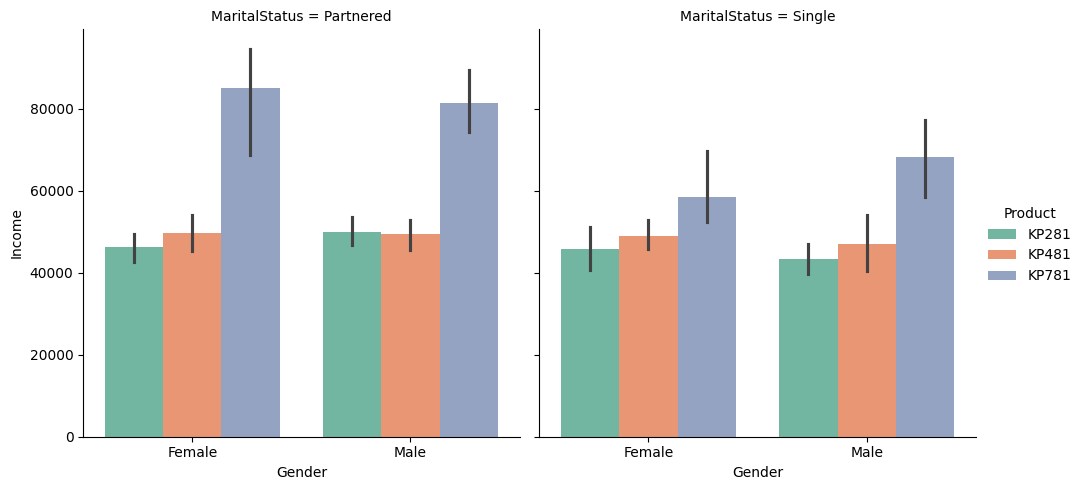

In [53]:
sns.catplot(x='Gender',y='Income',hue='Product',col='MaritalStatus',data=df,kind='bar',palette='Set2')
plt.show()

OBSERVATIONS:

1. KP781 remains as the product for  high income group irrespective of gender and their marital status.
2. KP481 remains as the product for medium income group across all group except partnered males.
3. KP281 is for low income group  across all group except partnered males.

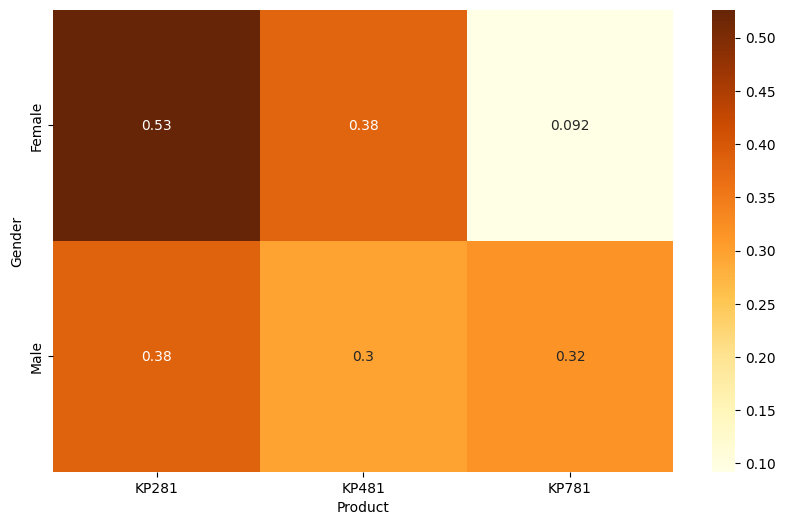

In [54]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 6
sns.heatmap(pd.crosstab(df['Gender'],df['Product'],normalize='index'), annot=True, cmap='YlOrBr')
#plt.title('Correlation Matrix')
plt.show()

OBSERVATIONS:

1. Probability(KP281|Female) = 0.53
2. Probability(KP481|Female) = 0.38
3. Probability(KP781|Female) = 0.092
4. Probability(KP281|male) = 0.38
5. Probability(KP481|male) = 0.3
6. Probability(KP781|male) = 0.32

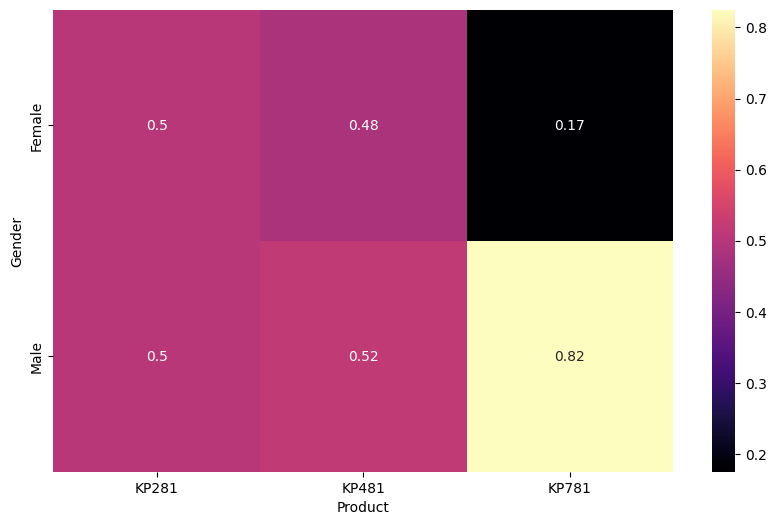

In [55]:
sns.heatmap(pd.crosstab(df['Gender'],df['Product'],normalize='columns'), annot=True, cmap='magma')

plt.show()

OBSERVATIONS:

1. Probability(Female|KP281) = 0.5
2. Probability(Female|KP481) = 0.48
3. Probability(Female|KP781) = 0.17
4. Probability(male|KP281) = 0.5
5. Probability(male|KP481) = 0.52
6. Probability(male|KP781) = 0.82

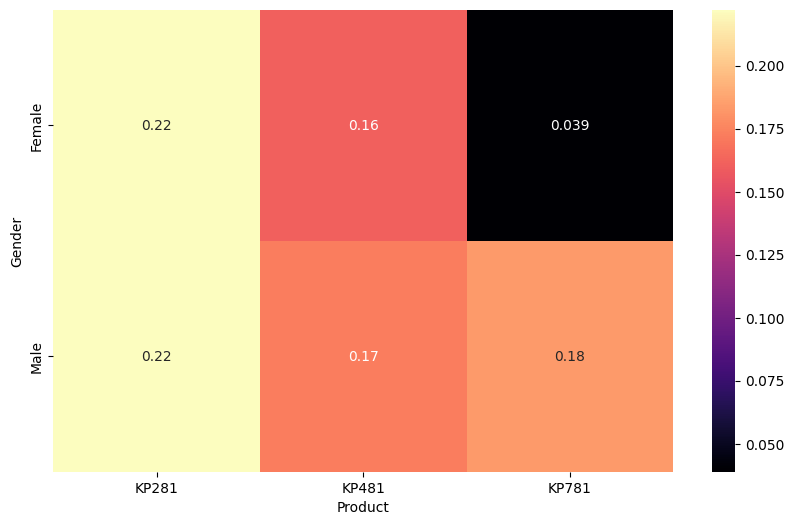

In [56]:
sns.heatmap(pd.crosstab(df['Gender'],df['Product'],normalize=True), annot=True, cmap='magma')

plt.show()

OBSERVATIONS:

JOINT PROBABILITY

1. Probability that a person is Female and purchased KP281 = 0.22
2. Probability that a person is Female and purchased KP481 = 0.16
3. Probability that a person is Female and purchased KP781 = 0.039
4. Probability that a person is male and purchased KP281 = 0.22
5. Probability that a person is male and purchased KP481 = 0.17
6. Probability that a person is male and purchased KP781 = 0.18

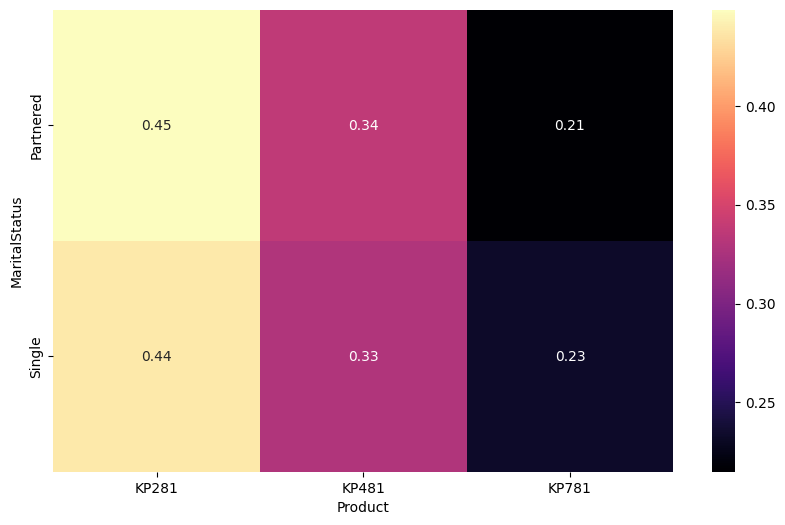

In [57]:
sns.heatmap(pd.crosstab(df['MaritalStatus'],df['Product'],normalize='index'), annot=True, cmap='magma')

plt.show()

OBSERVATIONS:

1. Probability(KP281|Partnered) = 0.45
2. Probability(KP481|Partnered) = 0.34
3. Probability(KP781|Partnered) = 0.21
4. Probability(KP281|Single) = 0.44
5. Probability(KP481|Single) = 0.33
6. Probability(KP781|Single) = 0.23

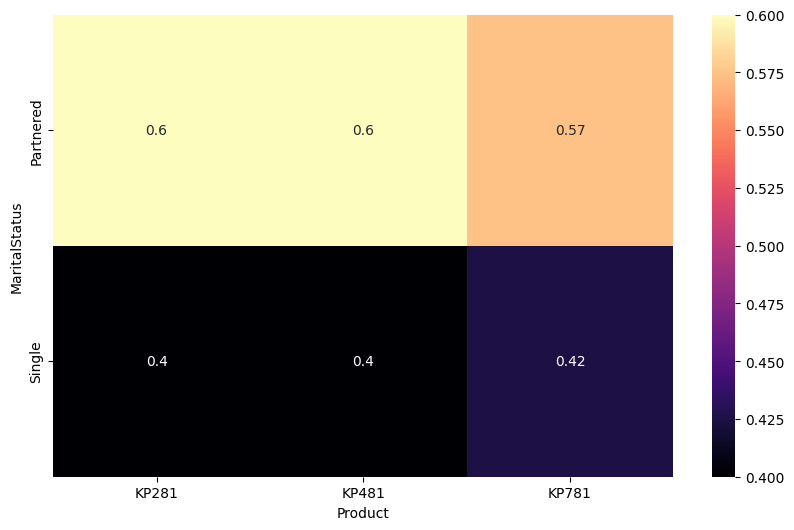

In [58]:
sns.heatmap(pd.crosstab(df['MaritalStatus'],df['Product'],normalize='columns'), annot=True, cmap='magma')

plt.show()

OBSERVATIONS:

1. Probability(Partnered|KP281) = 0.6
2. Probability(Partnered|KP481) = 0.6
3. Probability(Partnered|KP781) = 0.57
4. Probability(Single|KP281) = 0.4
5. Probability(Single|KP481) = 0.4
6. Probability(Single|KP781) = 0.42

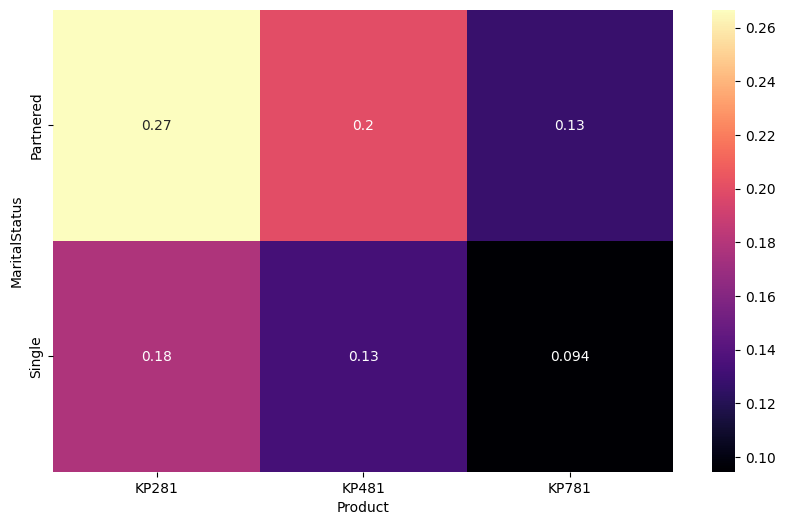

In [59]:
sns.heatmap(pd.crosstab(df['MaritalStatus'],df['Product'],normalize=True), annot=True, cmap='magma')

plt.show()

OBSERVATIONS:

1. Probability that the person is single and purchased KP281 = 0.18
2. Probability that the person is single and purchased KP481 = 0.13
3. Probability that the person is single and purchased KP781 = 0.094
4. Probability that the person is partnered and purchased KP281 = 0.27
5. Probability that the person is partnered and purchased KP481 = 0.2
6. Probability that the person is partnered and purchased KP781 = 0.13


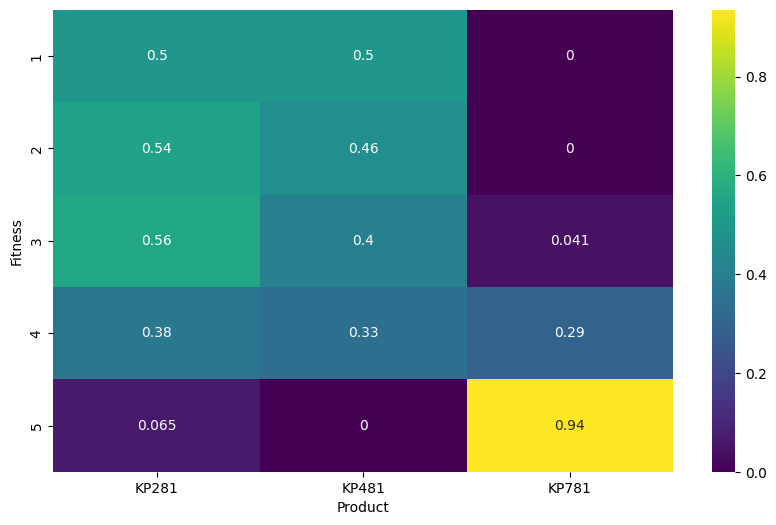

In [60]:
sns.heatmap(pd.crosstab(df['Fitness'],df['Product'],normalize='index'), annot=True, cmap='viridis')

plt.show()

OBSERVATIONS:

1. Probability(KP281|1) = 0.5
2. Probability(KP281|2) = 0.54
3. Probability(KP281|3) = 0.56
4. Probability(KP281|4) = 0.38
5. Probability(KP281|5) = 0.065
6. Probability(KP481|1) = 0.5
7. Probability(KP481|2) = 0.46
8. Probability(KP481|3) = 0.4
9. Probability(KP481|4) = 0.33
10. Probability(KP481|5) = 0
11. Probability(KP781|1) = 0
12. Probability(KP781|2) = 0
13. Probability(KP781|3) = 0.041
14. Probability(KP781|4) = 0.29
15. Probability(KP781|5) = 0.94


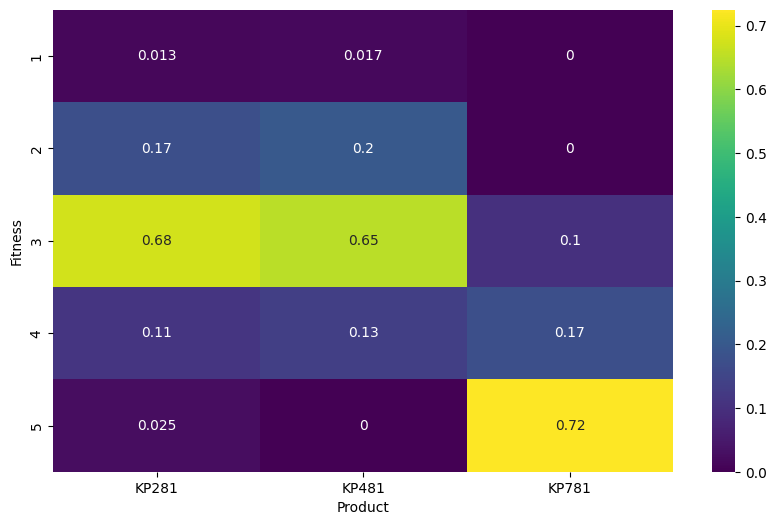

In [61]:
sns.heatmap(pd.crosstab(df['Fitness'],df['Product'],normalize='columns'), annot=True, cmap='viridis')

plt.show()

OBSERVATIONS:

1. Probability(1|KP281) = 0.013
2. Probability(2|KP281) = 0.17
3. Probability(3|KP281) = 0.68
4. Probability(4|KP281) = 0.11
5. Probability(5|KP281) = 0.025
6. Probability(1|KP481) = 0.017
7. Probability(2|KP481) = 0.2
8. Probability(3|KP481) = 0.65
9. Probability(4|KP481) = 0.13
10. Probability(5|KP481) = 0
11. Probability(1|KP781) = 0
12. Probability(2|KP781) = 0
13. Probability(3|KP781) = 0.1
14. Probability(4|KP781) = 0.17
15. Probability(5|KP781) = 0.72

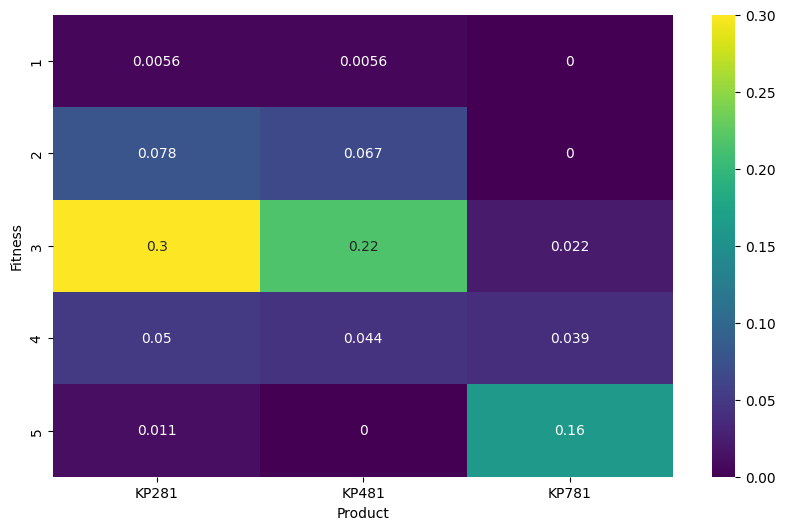

In [62]:
sns.heatmap(pd.crosstab(df['Fitness'],df['Product'],normalize=True), annot=True, cmap='viridis')

plt.show()

OBSERVATIONS:

1. Probability that a person has fitness rating 1 and purchased KP281 = 0.0056
2. Probability that a person has fitness rating 2 and purchased KP281 = 0.078
3. Probability that a person has fitness rating 3 and purchased KP281 = 0.3
4. Probability that a person has fitness rating 4 and purchased KP281 = 0.05
5. Probability that a person has fitness rating 5 and purchased KP281 = 0.011
6. Probability that a person has fitness rating 1 and purchased KP481 = 0.0056
7. Probability that a person has fitness rating 2 and purchased KP481 = 0.067
8. Probability that a person has fitness rating 3 and purchased KP481 = 0.22
9. Probability that a person has fitness rating 4 and purchased KP481 = 0.044
10. Probability that a person has fitness rating 5 and purchased KP481 = 0
11. Probability that a person has fitness rating 1 and purchased KP781 = 0
12. Probability that a person has fitness rating 2 and purchased KP781 = 0
13. Probability that a person has fitness rating 3 and purchased KP781 = 0.022
14. Probability that a person has fitness rating 4 and purchased KP781 = 0.039
15. Probability that a person has fitness rating 5 and purchased KP781 = 0.16

Marginal Probability

In [63]:
df['Gender'].value_counts(normalize=True)

,proportion
Gender,
Male,0.577778
Female,0.422222


In [64]:
df['MaritalStatus'].value_counts(normalize=True)

,proportion
MaritalStatus,
Partnered,0.594444
Single,0.405556


In [65]:
df['Usage'].value_counts(normalize=True)

,proportion
Usage,
3,0.383333
4,0.288889
2,0.183333
5,0.094444
6,0.038889
7,0.011111


In [66]:
df['Fitness'].value_counts(normalize=True)

,proportion
Fitness,
3,0.538889
5,0.172222
2,0.144444
4,0.133333
1,0.011111


In [67]:
df['Product'].value_counts(normalize=True)

,proportion
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


OBSERVATIONS:
KP281 is the highest selling product compared to KP481 and KP781.

<Axes: xlabel='Age', ylabel='Proportion'>

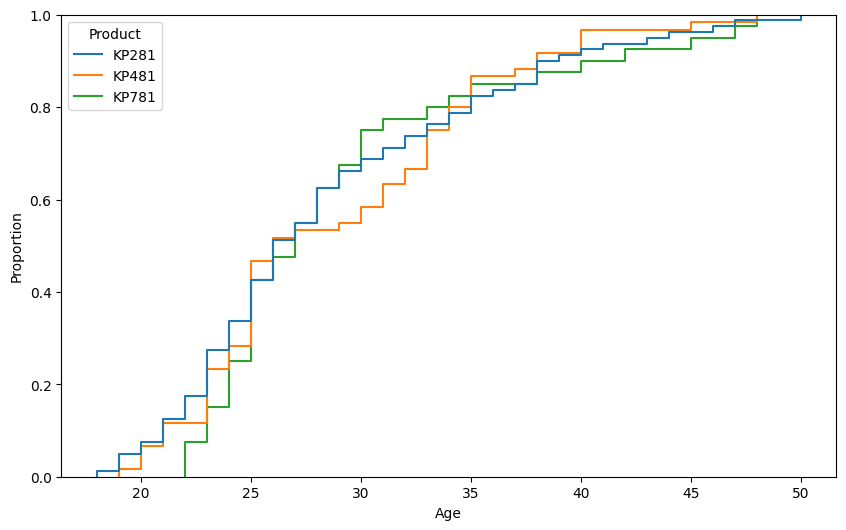

In [68]:
import seaborn as sns
sns.ecdfplot(data=df, x='Age', hue='Product')

<Axes: xlabel='Income', ylabel='Proportion'>

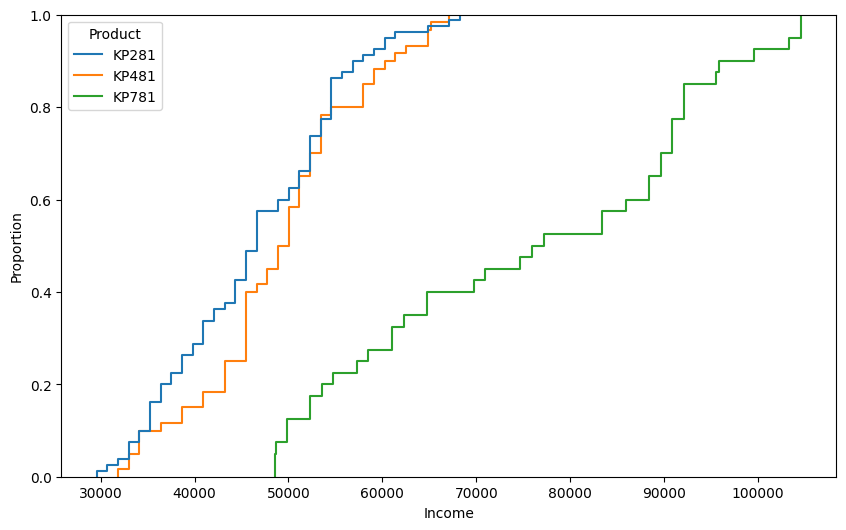

In [69]:
import seaborn as sns
sns.ecdfplot(data=df, x='Income', hue='Product')

<Axes: xlabel='Miles', ylabel='Proportion'>

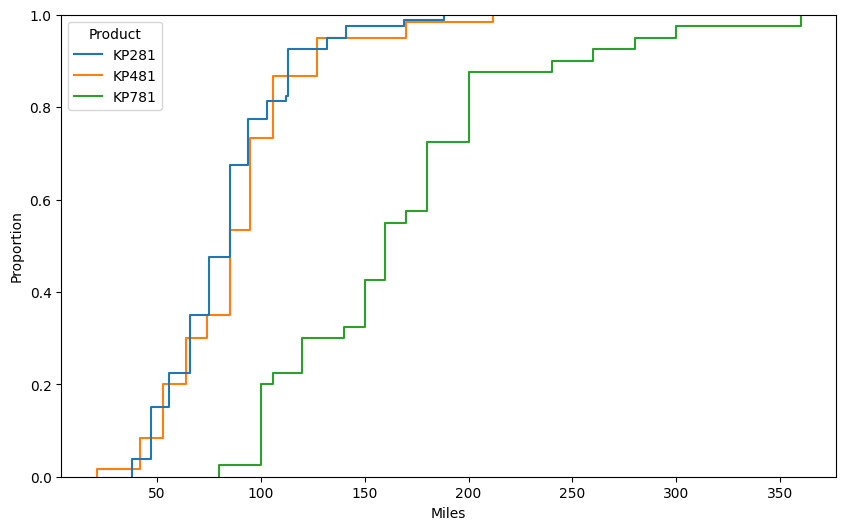

In [70]:
import seaborn as sns
sns.ecdfplot(data=df, x='Miles', hue='Product')

Reccomendation:

1. Promote KP281 and KP481  as budget friendly options , as the average income of people who bought these products where significantly lower than people who bought KP781
2. More women must be encouraged to buy our products .
3. Customers that have already improved their usage time and number of miles , must be encouraged to buy KP781.
4. Older individuals must also be encouraged to try our treadmills.
5. Campaign the treadmill KP781 as a premium product used by athletes, professionals and rich people .